In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [6]:
!gdown 1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg

Downloading...
From: https://drive.google.com/uc?id=1c6cjIULb3-fjyaVITdui_AFcKMz_lxlg
To: /media/narendra/52cb030f-a277-43de-99fb-50a567eb224f/Scaler/Semester 3/Term 2/Advanced ML/Class 7 : Anomaly Detection 2/AnomalyDetection.csv
100%|███████████████████████████████████████| 33.0k/33.0k [00:00<00:00, 645kB/s]


In [8]:
df = pd.read_csv('AnomalyDetection.csv')
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


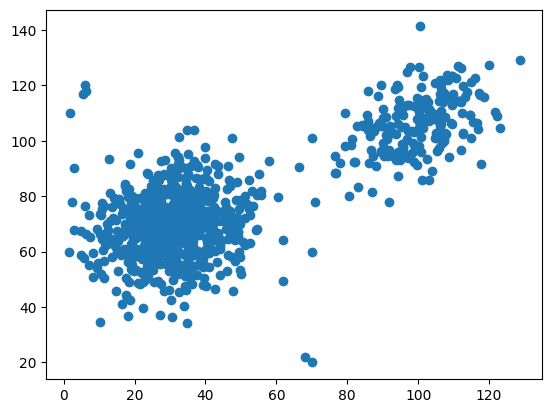

In [12]:
plt.scatter(x="Mileage" ,y="Price",data=df)

In [22]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.06,random_state=42)
y = model.fit_predict(df)

df["is_outlier"] = y

In [20]:
df['is_outlier'].value_counts()

is_outlier
 1    889
-1     19
Name: count, dtype: int64

Text(0, 0.5, 'Price')

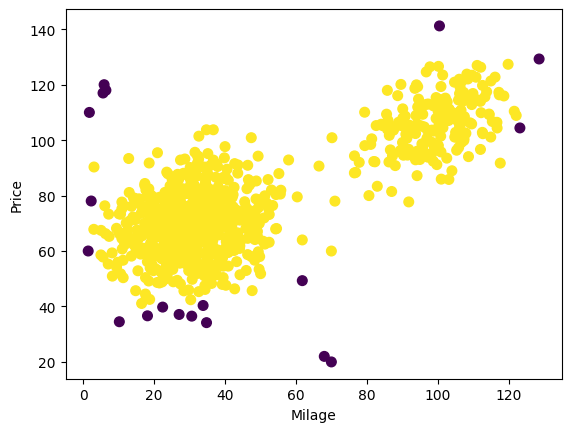

In [21]:
plt.scatter(df.Mileage,df.Price,s=48,c =df['is_outlier'])
plt.xlabel("Milage")
plt.ylabel("Price")

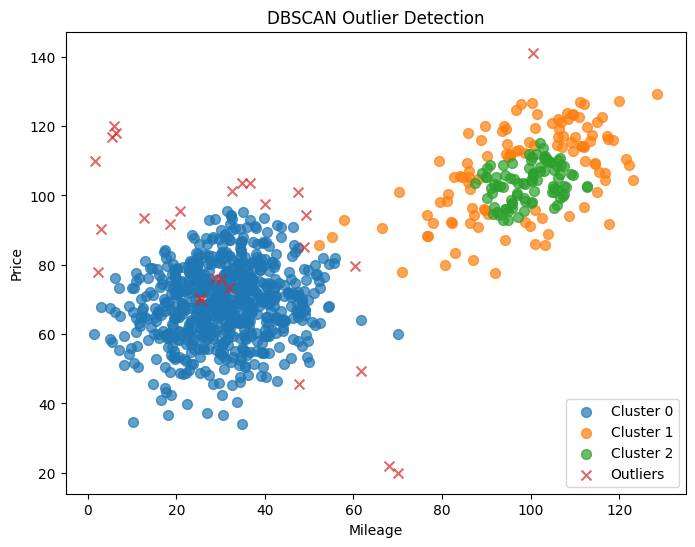

In [32]:
import matplotlib.pyplot as plt

# labels from DBSCAN
labels = df["cluster"]

# Colors for clusters
unique_labels = set(labels)

plt.figure(figsize=(8, 6))

for label in unique_labels:
    # Outliers = label = -1
    if label == -1:
        # plot outliers in red
        plt.scatter(
            df[labels == label].iloc[:,0],
            df[labels == label].iloc[:,1],
            s=50,
            marker="x",
            label="Outliers",
            alpha=0.7
        )
    else:
        # plot normal cluster points
        plt.scatter(
            df[labels == label].iloc[:,0],
            df[labels == label].iloc[:,1],
            s=50,
            label=f"Cluster {label}",
            alpha=0.7
        )

plt.title("DBSCAN Outlier Detection")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()


In [41]:
from sklearn.neighbors import LocalOutlierFactor

model  =  LocalOutlierFactor(contamination=0.05 , n_neighbors=25)
y =  model.fit_predict(df)

df["is_outlier"] = y

Text(0, 0.5, 'Price')

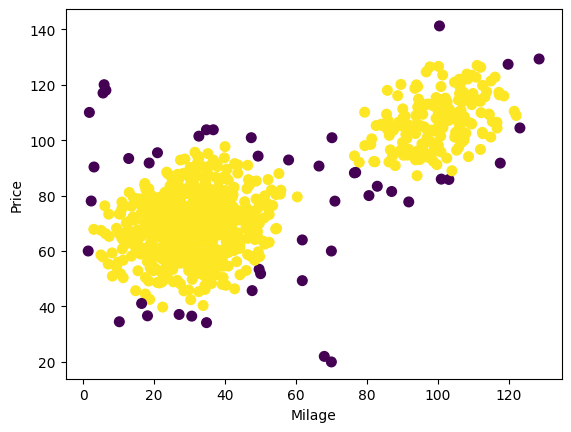

In [42]:
plt.scatter(df.Mileage,df.Price,s=48,c =df['is_outlier'])
plt.xlabel("Milage")
plt.ylabel("Price")